## 알고리즘 예제 6.6, 7, 8

문제 정의 : 해시 함수 -선형 조사법 알고리즘(삽입, 삭제, 탐색)

알고리즘 설명 

삽입 알고리즘 

1. 크기가 M인 테이블을 만들고 None(항목 없음)으로 초기화한다. 

2. 해시 함수로 킷값을 M으로 나눈 나머지 연산을 사용한다. 

3. 킷값을 해시 함수에 적용해 해시 주소 id를 구한다.

4. id번째 테이블이 비어있지 않으면 계속 다음 위치를 검사한다.

5. 비어있느 버킷을 찾으면 키를 저장한다. 

탐색 알고리즘 

1. if table[id] == None :  return None로 해당 버킷이 있었으면 찾는 항목이 없다고 한다. 

2. id = (id + 1 + M) % M로 해당 버킷이 비어있지 않은데 찾는 키도 아니면 다른 키에 의해 사용되고 있는 경우로 한다. 이 경우 연속적으로 다음 버킷을 검사한다. 

삭제 알고리즘 

1. if table[id] != -1 and table[id] == key :로 해당 버킷에 찾는 키가 있으면 이제 그 항목을 삭제한다. 이때, None으로 처리하지 않고 -1로 처리한다. 이것은 사용되었다가 삭제된 버킷을 의미한다.

손으로 푼 예제 :

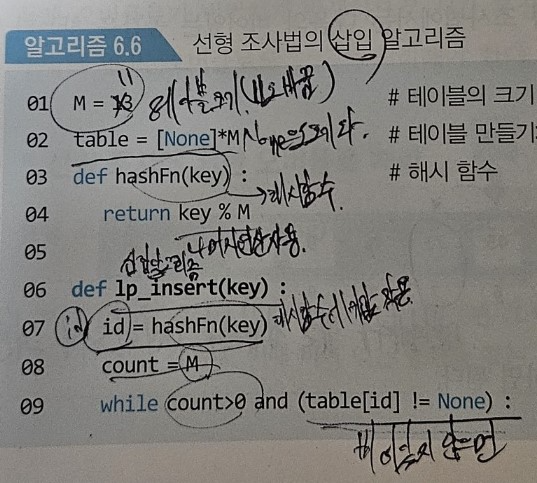

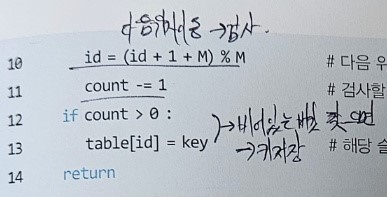

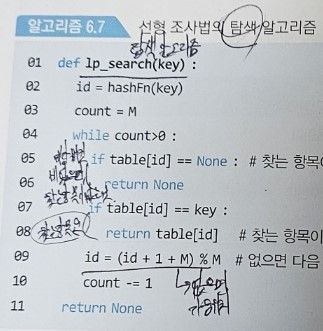

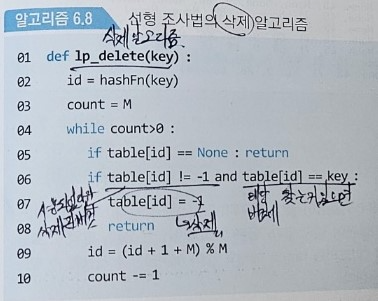

코드 개요 : 삽입 함수(def lp_insert(key)), 탐색 함수(def lp_search(key)), 삭제 함수(def lp_delete(key))

입력 변수 : 테이블 크기(M = 11), 테이블에 30, 18, 12, 22 삽입, 테이블에 18, 12 삭제

출력 변수 : 최초 table, 삽입-삭제한 중간 table, 마지막 22 탐색 table

In [7]:
#알고리즘 코드

M = 11
table = [None]*M
def hashFn(key) :
    return key % M

def lp_insert(key) :
    id = hashFn(key)
    count = M
    while count>0 and (table[id] != None) :
        id = (id + 1 + M) % M
        count -= 1
    if count > 0 :
        table[id] = key
    return

def lp_search(key) :
    id = hashFn(key)
    count = M
    while count > 0 :
        if table[id] == None :
            return None
        if table[id] == key :
            return table[id]
        id = (id + 1 + M) % M
        count -= 1
    return None

def lp_delete(key) :
    id = hashFn(key)
    count = M
    while count > 0 :
        if table[id] == None : return
        if table[id] != -1 and table[id] == key :
            table[id] = -1
            return
        id = (id + 1 + M) % M
        count -= 1

In [8]:
#테스트 코드

print("   최초:", table)
lp_insert(30); print("30 삽입:", table)
lp_insert(18); print("18 삽입:", table)
lp_insert(12); print("12 삽입:", table)
lp_insert(22); print("22 삽입:", table)
lp_delete(18); print("18 삭제:", table)
lp_delete(12); print("12 삭제:", table)
print("22 탐색:", lp_search(22))

   최초: [None, None, None, None, None, None, None, None, None, None, None]
30 삽입: [None, None, None, None, None, None, None, None, 30, None, None]
18 삽입: [None, None, None, None, None, None, None, 18, 30, None, None]
12 삽입: [None, 12, None, None, None, None, None, 18, 30, None, None]
22 삽입: [22, 12, None, None, None, None, None, 18, 30, None, None]
18 삭제: [22, 12, None, None, None, None, None, -1, 30, None, None]
12 삭제: [22, -1, None, None, None, None, None, -1, 30, None, None]
22 탐색: 22


수행 결과

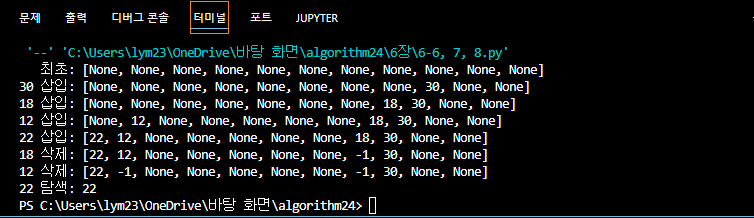

복잡도 분석

킷값으로부터 레코드가 저장될 위치를 계산하는 함수를 해시 함수(hash function)라 한다. 예를 들어, 탐색키가 모두 1~1000 사이의 정수라고 가정하자. 가장 빠르게 탐색할 수 있는 방법은 1000개의 항목을 가지는 배열(우편함)을 만드는 것이다. 자료의 삽입과 탐색은 탐색키를 인덱스로 생각하고 그 위치를 저장하거나 읽어오면 된다. 이 경우의 해시 함수는 h(key) = key가 된다. 이들 연산은 명백하게 O(1)이 된다. 

+해싱의 시간 복잡도는 O(1)이지만, 이것은 충돌이 전혀 일어나지 않는 상황에서만 가능하다. 따라서 실제 해싱의 탐색 연산은 O(1)보다는 느리다. 